In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Amazon_Products.csv",low_memory=False)

In [78]:
import warnings
warnings.filterwarnings('ignore')

In [79]:
df.shape

(10004, 895)

In [80]:
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,...,Unnamed: 885,Unnamed: 886,Unnamed: 887,Unnamed: 888,Unnamed: 889,Unnamed: 890,Unnamed: 891,Unnamed: 892,Unnamed: 893,Unnamed: 894
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
drop_in=[]
for i in range(0,895):

    if(df[df.columns[i]].isna().sum()>5000):
        drop_in.append(i)
df = df.drop(df.columns[drop_in],axis = 1)
df.reset_index(drop=True, inplace=True)

In [82]:
df.drop([2002,2004],inplace=True)
df.reset_index(drop=True, inplace=True)

In [83]:
def ReturnFirstValuePrice(value):
    value=value.split()
    values=value[0][1:-1]
    return values
def ReturnFirstValue(value):
    value=value.split()
    values=value[0]
    return values
def ReturnLastValue(value):
    value=value.split()
    values=value[-1]
    return values

In [84]:
def FloatChecker(array):
    flag=0
    for i in range(0,len(array)):
        try:
            array[i]=float(array[i])
        except:
            print(i)
            print(array[i])
            flag+=1
    if(flag==0):
        print("Ready to be converted to float")

In [85]:
def AllTermsShower(array):
    for i in range(0,len(array)):
        print(array[i])

In [86]:
df.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item'],
      dtype='object')

## Price Column Handling


In [87]:
df.price=df.price.astype(str)

#df.dropna(subset='price',inplace=True)
#df.reset_index(drop=True, inplace=True)
df.price=df.price.apply(ReturnFirstValue)


In [88]:
df.price

0         £3.42
1        £16.99
2         £9.99
3        £39.99
4        £32.19
          ...  
9997     £22.95
9998     £39.99
9999     £43.99
10000    £49.81
10001    £21.20
Name: price, Length: 10002, dtype: object

In [89]:
df.price=df.price.apply(ReturnFirstValuePrice)

In [90]:
null_price=df[(df['price']=="a")].index
null_price

Int64Index([   9,   14,   15,   16,   17,   25,   27,   28,   33,   38,
            ...
            9928, 9929, 9932, 9936, 9941, 9954, 9971, 9978, 9985, 9986],
           dtype='int64', length=1435)

In [91]:
non_null_price=df[(df.price.notna())].index

In [92]:
df.price[null_price]=np.nan

In [93]:
FloatChecker(df.price)

2002
""subtext"":""
2003
""subtext"":""
7096
2,439.9


In [94]:
df.price[2002]=np.nan
df.price[2003]=np.nan
df.price[7096]=float(2439.9)

In [95]:
FloatChecker(df.price)

Ready to be converted to float


In [96]:
df.price=df.price.astype(float)

In [97]:
df.price.skew()

21.412247790025777

In [98]:
df.describe()

,price
count,8565.000000
mean,20.221319
std,46.346504
min,0.000000
25%,4.900000
50%,10.600000
75%,19.900000
max,2439.900000


In [99]:
df.price.mean()

20.221319322825455

In [100]:

df.price=df.price.fillna(df.price[non_null_price].mean())

In [101]:
price_75=np.percentile(df.price,75)
price_25=np.percentile(df.price,25)
iqr_pri=price_75-price_25
upper_pri=df.price.mean()+1.5*iqr_pri


df.price[df[(df.price>upper_pri)].index]=upper_pri


In [102]:
df.price.skew()

0.8724106819865111

In [103]:
df.price.describe()

count    10002.000000
mean        15.423032
std         11.709422
min          0.000000
25%          5.900000
50%         12.900000
75%         20.221319
max         41.703298
Name: price, dtype: float64

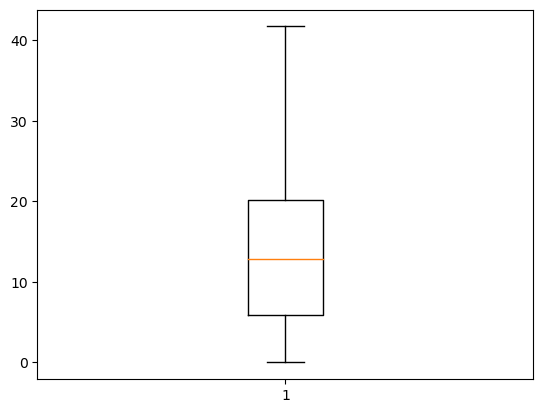

In [104]:
plt.boxplot(df.price,whis=1.5)
plt.show()

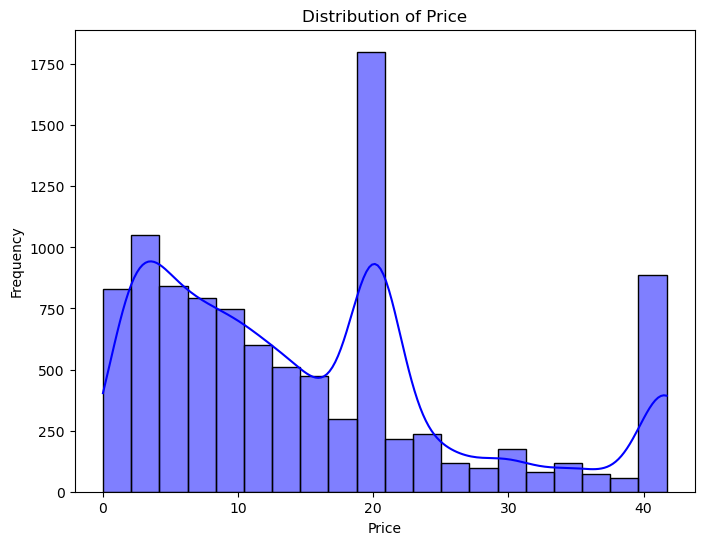

In [105]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='price', bins=20, kde=True, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [106]:
df.isna().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                             0
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
description                                     651
product_information                              59
product_description                             652
items_customers_buy_after_viewing_this_item    3066
dtype: int64

## Average Review Rating Column


In [107]:
df.average_review_rating=df.average_review_rating.astype(str)


In [108]:
df.average_review_rating=df.average_review_rating.apply(ReturnFirstValue)

In [109]:
df.average_review_rating

0        4.9
1        4.5
2        3.9
3        5.0
4        4.7
        ... 
9997     5.0
9998     4.0
9999     5.0
10000    5.0
10001    4.5
Name: average_review_rating, Length: 10002, dtype: object

In [110]:
df.average_review_rating[2002]=np.nan
df.average_review_rating[2003]=np.nan

In [111]:
FloatChecker(df.average_review_rating)

Ready to be converted to float


In [112]:
df.average_review_rating=df.average_review_rating.astype(float)

In [113]:
df.average_review_rating.median()

5.0

In [114]:
df.average_review_rating.skew()

-0.9429479144256939

In [115]:
df.average_review_rating=df.average_review_rating.fillna(df.average_review_rating.mean())

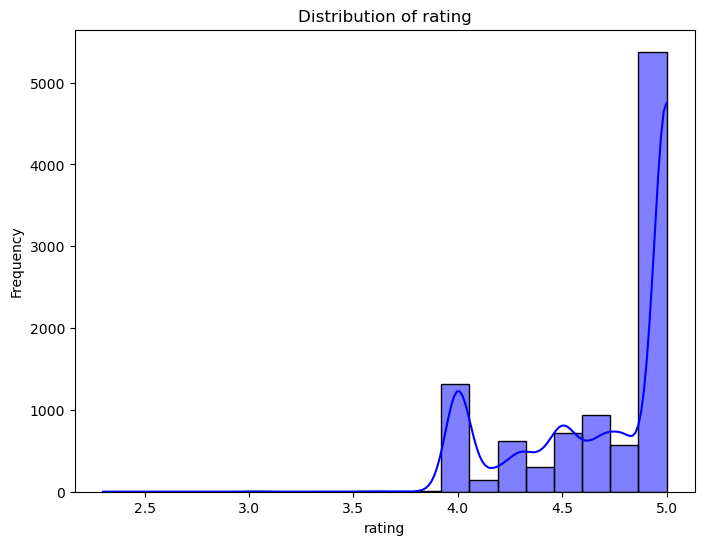

In [116]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='average_review_rating', bins=20, kde=True, color='blue')
plt.title('Distribution of rating')
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.show()

In [117]:
df.isna().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                             0
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                             0
amazon_category_and_sub_category                690
description                                     651
product_information                              59
product_description                             652
items_customers_buy_after_viewing_this_item    3066
dtype: int64

## Number of reviews


In [118]:
df.number_of_reviews=df.number_of_reviews.astype(str)


In [119]:
df.number_of_reviews

0        15
1         2
2        17
3         1
4         3
         ..
9997      3
9998      1
9999      1
10000     1
10001    11
Name: number_of_reviews, Length: 10002, dtype: object

In [120]:
FloatChecker(df.number_of_reviews)

2002
subtextKey"":""android-tagline""
2003
subtextKey"":""android-tagline""
8874
1,040
9317
1,399


In [121]:
df.number_of_reviews[8874]=float(1040)
df.number_of_reviews[9317]=float(1399)
df.number_of_reviews[2002]=np.nan
df.number_of_reviews[2003]=np.nan

In [122]:
FloatChecker(df.number_of_reviews)

Ready to be converted to float


In [123]:
df.number_of_reviews=df.number_of_reviews.astype(float)

In [124]:
df.number_of_reviews=df.number_of_reviews.fillna(df.number_of_reviews.mean())

In [165]:
nor_75=np.percentile(df.number_of_reviews,75)
nor_25=np.percentile(df.number_of_reviews,25)
iqr_nor=nor_75-nor_25
upper_nor=df.number_of_reviews.mean()+1.5*iqr_nor


df.number_of_reviews[df[(df.number_of_reviews>upper_pri)].index]=upper_nor


In [166]:
df.number_of_reviews.skew()

2.346461610836545

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10002 non-null  object 
 1   product_name                                 10002 non-null  object 
 2   manufacturer                                 9995 non-null   object 
 3   price                                        10002 non-null  float64
 4   number_available_in_stock                    7502 non-null   object 
 5   number_of_reviews                            10002 non-null  float64
 6   number_of_answered_questions                 9237 non-null   object 
 7   average_review_rating                        10002 non-null  float64
 8   amazon_category_and_sub_category             9312 non-null   object 
 9   description                                  9351 non-null   object 
 10

## Available in stock column


In [128]:
df.number_available_in_stock=df.number_available_in_stock.astype(str)

In [129]:

null_available=df[(df.number_available_in_stock=="nan")].index
df.number_available_in_stock=df.number_available_in_stock.apply(ReturnFirstValue)

In [130]:
df.number_available_in_stock[null_available]=str(0)

In [131]:
FloatChecker(df.number_available_in_stock)

2002
text"":""Appstore
2003
text"":""Appstore


In [132]:

df.number_available_in_stock[2002]=float(0)
df.number_available_in_stock[2003]=float(0)

In [133]:
AllTermsShower(df.number_available_in_stock)

5.0
0.0
2.0
0.0
0.0
0.0
0.0
3.0
4.0
1.0
6.0
0.0
2.0
2.0
18.0
12.0
2.0
1.0
26.0
2.0
0.0
2.0
0.0
37.0
0.0
1.0
35.0
1.0
2.0
0.0
3.0
0.0
4.0
0.0
2.0
22.0
11.0
0.0
3.0
11.0
0.0
16.0
0.0
0.0
2.0
31.0
1.0
9.0
0.0
29.0
0.0
0.0
6.0
3.0
5.0
2.0
2.0
3.0
0.0
0.0
9.0
0.0
0.0
33.0
7.0
4.0
15.0
2.0
13.0
4.0
3.0
2.0
19.0
0.0
27.0
2.0
0.0
0.0
0.0
3.0
3.0
0.0
2.0
12.0
10.0
4.0
6.0
6.0
0.0
3.0
1.0
0.0
9.0
0.0
0.0
5.0
0.0
2.0
1.0
3.0
5.0
0.0
0.0
2.0
0.0
0.0
2.0
2.0
0.0
5.0
6.0
6.0
4.0
2.0
0.0
19.0
2.0
35.0
5.0
7.0
3.0
2.0
4.0
9.0
7.0
3.0
2.0
6.0
39.0
0.0
0.0
6.0
3.0
18.0
4.0
5.0
2.0
0.0
0.0
0.0
2.0
1.0
0.0
23.0
3.0
4.0
38.0
4.0
4.0
8.0
0.0
4.0
2.0
9.0
5.0
0.0
2.0
6.0
2.0
3.0
0.0
1.0
0.0
0.0
17.0
1.0
5.0
10.0
5.0
2.0
2.0
2.0
1.0
9.0
0.0
1.0
4.0
2.0
34.0
5.0
1.0
0.0
4.0
26.0
0.0
6.0
16.0
6.0
0.0
1.0
3.0
12.0
3.0
3.0
19.0
4.0
22.0
30.0
1.0
6.0
2.0
21.0
3.0
2.0
3.0
5.0
0.0
1.0
19.0
6.0
10.0
2.0
17.0
0.0
4.0
0.0
0.0
10.0
2.0
0.0
3.0
17.0
14.0
5.0
4.0
1.0
3.0
3.0
32.0
2.0
0.0
1.0
1.0
19.0
5.0
4.0
9.0
0.0
3.0
4.

In [134]:
df.number_available_in_stock=df.number_available_in_stock.astype(float)

In [135]:
df.number_available_in_stock.skew()

2.96239774186609

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10002 non-null  object 
 1   product_name                                 10002 non-null  object 
 2   manufacturer                                 9995 non-null   object 
 3   price                                        10002 non-null  float64
 4   number_available_in_stock                    10002 non-null  float64
 5   number_of_reviews                            10002 non-null  float64
 6   number_of_answered_questions                 9237 non-null   object 
 7   average_review_rating                        10002 non-null  float64
 8   amazon_category_and_sub_category             9312 non-null   object 
 9   description                                  9351 non-null   object 
 10

## Number of answered questions

In [137]:

df.number_of_answered_questions=df.number_of_answered_questions.astype(str)
null_answered=df[(df.number_available_in_stock=="nan")].index
df.number_of_answered_questions[null_answered]="0"

In [138]:
df.number_of_answered_questions[2002]=np.nan
df.number_of_answered_questions[2003]=np.nan

In [139]:
FloatChecker(df.number_of_answered_questions)

Ready to be converted to float


In [140]:
df.number_of_answered_questions=df.number_of_answered_questions.astype(float)

In [141]:
df.number_of_answered_questions.skew()

7.820504844160154

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10002 non-null  object 
 1   product_name                                 10002 non-null  object 
 2   manufacturer                                 9995 non-null   object 
 3   price                                        10002 non-null  float64
 4   number_available_in_stock                    10002 non-null  float64
 5   number_of_reviews                            10002 non-null  float64
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        10002 non-null  float64
 8   amazon_category_and_sub_category             9312 non-null   object 
 9   description                                  9351 non-null   object 
 10

In [143]:
df.isna().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                             0
number_available_in_stock                         0
number_of_reviews                                 0
number_of_answered_questions                    767
average_review_rating                             0
amazon_category_and_sub_category                690
description                                     651
product_information                              59
product_description                             652
items_customers_buy_after_viewing_this_item    3066
dtype: int64

## Manufacturer

In [144]:
man_arr=df.manufacturer.unique()
man_arr

array(['Hornby', 'FunkyBuys', 'ccf', ..., 'Captain america', 'IronMan',
       'Super Heroes'], dtype=object)

In [145]:
def handleman(value):
    for i in range(len(man_arr)):
        if(value==man_arr[i]):
            value=i
    return value


In [146]:
df.manufacturer=df.manufacturer.apply(handleman)

In [147]:
df.manufacturer=df.manufacturer.astype(float)

In [148]:
df.shape

(10002, 13)

In [149]:
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,0.0,3.4,5.0,15.0,1.0,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,1.0,16.9,0.0,2.0,1.0,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,2.0,9.9,2.0,17.0,2.0,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,0.0,39.9,0.0,1.0,2.0,5.0,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,0.0,32.1,0.0,3.0,2.0,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...


## Category Handling

In [150]:
def handlecateg(value):
    value=value.split(' > ')
    return value
    

In [151]:
df.amazon_category_and_sub_category=df.amazon_category_and_sub_category.astype(str)
df.amazon_category_and_sub_category=df.amazon_category_and_sub_category.apply(handlecateg)

In [152]:
df['category']=1
df['subcategory']=1
for i in range(0,len(df)):
    if len(df.amazon_category_and_sub_category[i])>1:
        df['category'][i]=df.amazon_category_and_sub_category[i][0]
        df['subcategory'][i]=df.amazon_category_and_sub_category[i][1]
    if len(df.amazon_category_and_sub_category[i])==1:
        df['category'][i]=np.nan
        df['subcategory'][i]=np.nan

In [159]:
df2=pd.DataFrame()
df2['category']=1
df2['frequency']=1
df2['category']=df.category.unique()
for i in range(0,len(df2)):
    df2['frequency'][i]=len(df[(df.category==df2.category[i])])

In [160]:
df2

,category,frequency
0,Hobbies,1464.0
1,NaN,0.0
2,Characters & Brands,960.0
3,Fancy Dress,585.0
4,Bags,4.0
5,Arts & Crafts,802.0
6,Handbags & Shoulder Bags,1.0
7,Games,941.0
8,Figures & Playsets,1111.0
9,Home Accessories,5.0


In [161]:
df3=pd.DataFrame()
df3['category']=1
df3['frequency']=1
df3['subcategory']=df.subcategory.unique()
for i in range(0,len(df3)):
    df3['frequency'][i]=len(df[(df.subcategory==df3.subcategory[i])])
df3.sort_values(by='frequency',ascending=False)

,category,frequency,subcategory
24,NaN,1100.0,Toy Vehicles & Accessories
31,NaN,592.0,Accessories
20,NaN,485.0,Science Fiction & Fantasy
8,NaN,427.0,Children's Craft Kits
0,NaN,387.0,Model Trains & Railway Sets
...,...,...,...
102,NaN,1.0,Drawing & Painting Supplies
105,NaN,1.0,Pencils
106,NaN,1.0,Pens & Refills
148,NaN,1.0,Drinking Games


## EDA

In [77]:
df.describe()

,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating
count,9995.000000,10002.000000,10002.000000,10002.000000,9235.000000,10002.000000
mean,852.933367,15.423032,5.936513,9.139952,1.834976,4.707283
std,749.976440,11.709422,8.360663,33.694403,2.517268,0.371906
min,0.000000,0.000000,0.000000,1.000000,1.000000,2.300000
25%,256.000000,5.900000,0.000000,1.000000,1.000000,4.500000
50%,586.000000,12.900000,3.000000,2.000000,1.000000,5.000000
75%,1388.000000,20.221319,7.000000,6.000000,2.000000,5.000000
max,2652.000000,41.703298,92.000000,1399.000000,39.000000,5.000000


In [78]:
df.skew()

C:\Users\Swar Jagdale\AppData\Local\Temp\ipykernel_14920\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


manufacturer                     0.776464
price                            0.872411
number_available_in_stock        2.962398
number_of_reviews               17.611352
number_of_answered_questions     7.820505
average_review_rating           -0.943892
dtype: float64

In [167]:
df.corr()

,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating
manufacturer,1.000000,-0.069945,-0.127503,-0.032172,-0.020644,0.003997
price,-0.069945,1.000000,0.029244,-0.038782,-0.015054,0.046168
number_available_in_stock,-0.127503,0.029244,1.000000,0.267821,0.016379,-0.020077
number_of_reviews,-0.032172,-0.038782,0.267821,1.000000,0.035039,-0.246468
number_of_answered_questions,-0.020644,-0.015054,0.016379,0.035039,1.000000,-0.025725
average_review_rating,0.003997,0.046168,-0.020077,-0.246468,-0.025725,1.000000


In [170]:
no_of_prod=df.groupby('manufacturer')['product_name'].count().sort_values(ascending=False)
top_no_of_products=no_of_prod.index
print("The top 5 manufacturers with the most number of products are: ")
for i in range(0,5):
    print(man_arr[int(top_no_of_products[i])])

The top 5 manufacturers with the most number of products are: 
LEGO
Disney
Oxford Diecast
Playmobil
Star Wars


In [81]:
top_rated=df.groupby('manufacturer')['average_review_rating'].mean().sort_values(ascending=False)


In [82]:
top_rated

manufacturer
702.0     5.0
1760.0    5.0
1756.0    5.0
860.0     5.0
2595.0    5.0
         ... 
817.0     3.5
2621.0    3.3
1364.0    3.0
1078.0    3.0
580.0     3.0
Name: average_review_rating, Length: 2652, dtype: float64

In [83]:
np.where(man_arr=='LEGO')

(array([275], dtype=int64),)

In [84]:
num1=df[(df['manufacturer']==0)]

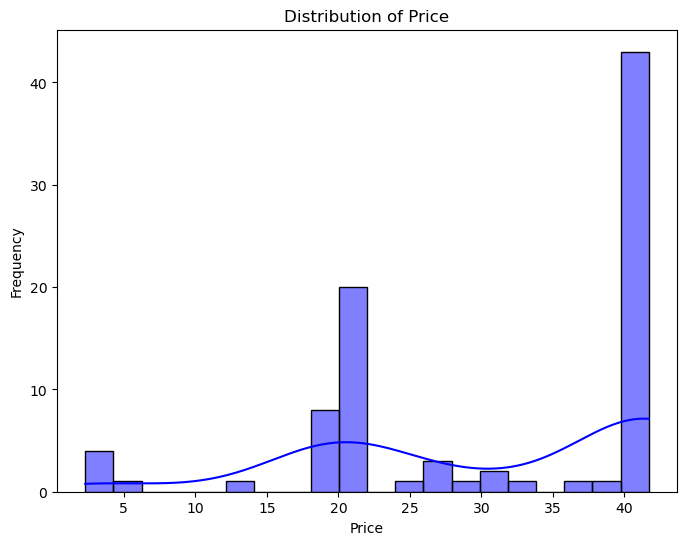

In [85]:
plt.figure(figsize=(8, 6))
sns.histplot(data=num1, x='price', bins=20, kde=True, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [163]:
df

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item,category,subcategory
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,0.0,3.400000,5.0,15.0,1.0,4.9,"[Hobbies, Model Trains & Railway Sets, Rail Ve...",Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Hobbies,Model Trains & Railway Sets
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,1.0,16.900000,0.0,2.0,1.0,4.5,"[Hobbies, Model Trains & Railway Sets, Rail Ve...",Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Hobbies,Model Trains & Railway Sets
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,2.0,9.900000,2.0,17.0,2.0,3.9,"[Hobbies, Model Trains & Railway Sets, Rail Ve...",BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,Hobbies,Model Trains & Railway Sets
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,0.0,39.900000,0.0,1.0,2.0,5.0,"[Hobbies, Model Trains & Railway Sets, Rail Ve...",Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,Hobbies,Model Trains & Railway Sets
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,0.0,32.100000,0.0,3.0,2.0,4.7,"[Hobbies, Model Trains & Railway Sets, Rail Ve...",Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,Hobbies,Model Trains & Railway Sets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,31.0,22.900000,5.0,3.0,3.0,5.0,"[Hobbies, Collectible Figures & Memorabilia, C...",DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,Hobbies,Collectible Figures & Memorabilia
9998,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",90.0,39.900000,0.0,1.0,3.0,4.0,"[Characters & Brands, Star Wars, Toys]",NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,Characters & Brands,Star Wars
9999,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica,2359.0,41.703298,3.0,1.0,3.0,5.0,"[Novelty & Special Use, Novelty, Accessories, ...",*Includes 1x Badge with holder and chain *High...,Technical Details Item Weight159 g Product Dim...,*Includes 1x Badge with holder and chain *High...,http://www.amazon.co.uk/Olde-Scotland-Yard-Ltd...,Novelty & Special Use,Novelty
10000,cd783d0b8b44e631b9788b203eaaefae,Justice League of America Series 3 Green Lante...,180.0,41.703298,3.0,1.0,3.0,5.0,"[Hobbies, Collectible Figures & Memorabilia, C...",Designed by Ed BenesIt's here - the third seri...,Technical Details Item Weight181 g Product Dim...,Designed by Ed BenesIt's here - the third seri...,NaN,Hobbies,Collectible Figures & Memorabilia


In [168]:

df.to_csv('Amazon_Products_clean.csv', index=False)


In [162]:

df2.to_csv('Amazon_category.csv', index=False)

df3.to_csv('Amazon_subcategory.csv', index=False)


In [174]:
np.reshape(man_arr,(1,-1))

array([['Hornby', 'FunkyBuys', 'ccf', ..., 'Captain america', 'IronMan',
        'Super Heroes']], dtype=object)

In [177]:
ManArr=pd.DataFrame(man_arr)

In [178]:
ManArr

,0
0,Hornby
1,FunkyBuys
2,ccf
3,Generic
4,Chuggington
...,...
2648,Feldherr
2649,GGS
2650,Captain america
2651,IronMan


In [179]:
no_of_prod.to_csv('ManToFreq.csv',index=False)
ManArr.to_csv('ManArr.csv',index=False)